Per creare un barchart invece di un linechart è sufficiente sostituire ply.plot() con plt.bar()

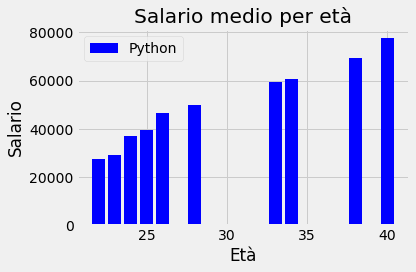

In [35]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
ages_x = [ 22, 23, 24, 25, 26, 28, 33, 34, 38, 40]

py_dev_y = [ 27455, 29330, 37234, 39564, 46456, 49765, 59534, 60886, 69456, 77544]
plt.bar(ages_x, py_dev_y, label='Python', color='b', linewidth=3)

plt.title('Salario medio per età')
plt.xlabel('Età')
plt.ylabel('Salario')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('grafico.png')
plt.show()

E' possibile creare mischiare lineplot e barchart

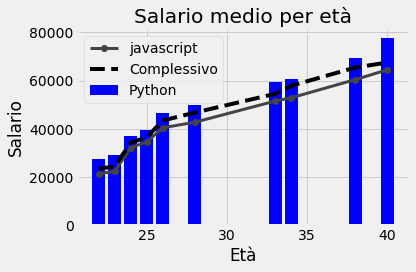

In [36]:
plt.style.use('fivethirtyeight')

ages_x = [ 22, 23, 24, 25, 26, 28, 33, 34, 38, 40]

py_dev_y = [ 27455, 29330, 37234, 39564, 46456, 49765, 59534, 60886, 69456, 77544]
plt.bar(ages_x, py_dev_y, label='Python', color='b', linewidth=3)

js_dev_y = [ 21455, 22330, 32234, 34564, 40456, 42765, 51534, 52886, 60456, 64544]
plt.plot(ages_x, js_dev_y, label='javascript', color='#444444', marker='o', linewidth=3)

dev_y = [ 23455, 24433, 34234, 36564, 43456, 46765, 54534, 57886, 65456, 67544]
plt.plot(ages_x, dev_y, linestyle='--', color='k', label='Complessivo')

plt.title('Salario medio per età')
plt.xlabel('Età')
plt.ylabel('Salario')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('grafico.png')
plt.show()

Per creare barchart con le barre affiancate è necessario utilizzare numpy per creare l'asse x.
E' necessario creare un numpy array della lunghezza dell'asse x per poi, dopo aver settato la larghezza della colonna, shiftare i punti dove disegnare le barre

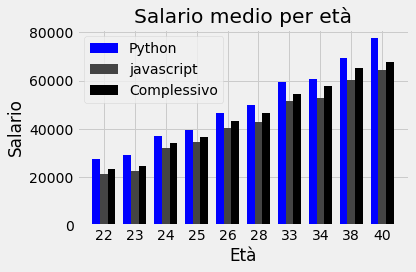

In [37]:
import numpy as np

plt.style.use('fivethirtyeight')

ages_x = [ 22, 23, 24, 25, 26, 28, 33, 34, 38, 40]
# aggiunto per il nuovo asse x
x_indexes = np.arange(len(ages_x))
# fisso la larghezza di una colonna
width=0.25

py_dev_y = [ 27455, 29330, 37234, 39564, 46456, 49765, 59534, 60886, 69456, 77544]
plt.bar(x_indexes - width, py_dev_y, width=width, label='Python', color='b', linewidth=3)

js_dev_y = [ 21455, 22330, 32234, 34564, 40456, 42765, 51534, 52886, 60456, 64544]
plt.bar(x_indexes, js_dev_y, width=width,label='javascript', color='#444444', linewidth=3)

dev_y = [ 23455, 24433, 34234, 36564, 43456, 46765, 54534, 57886, 65456, 67544]
plt.bar(x_indexes + width, dev_y, width=width, linestyle='--', color='k', label='Complessivo')

# Per settare le label dell'asse x (che diversamente non farebbero vedere le label corrette)
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.title('Salario medio per età')
plt.xlabel('Età')
plt.ylabel('Salario')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.savefig('grafico.png')
plt.show()

# Import dati da file CSV
Ci sono diversi metodi.<br>
Uno di questi è quello che prevede l'utilizzo del modulo csv per leggere il csv e importarlo in un dictionary.<br>
Successivamente è necessario splittare i valori del dict utilizzando il separatore ';' e utilizzare il Counter per contare le occorrenze dei diversi linguaggi presenti

Il risultato è una lista di touple.<br>
Per tenere solo quelli con più occorrenze

In [41]:
language_counter.most_common(15)

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

Per ottenere il barchart è necessario dividere i valori che dovranno andare sui 2 assi.<br>
Per ogni asse dobbiamo avere la lista dei valori da visualizzare. Sull'asse x andremo a visualizzare i linguaggi e sull'asse y andremo a visualizzare il conteggio

In [46]:
languages = []
popularity = []
for lang, ctr in language_counter.most_common():
    languages.append(lang)
    popularity.append(ctr)
   

In questo modo otteniamo le 2 liste da visualizzare nel barchart.<br>
Per rendere i linguaggi più leggibili è preferibile fare un grafico orizzontale utilizzando il metodo barh() al posto di bar() e invertendo così gli assi x e y

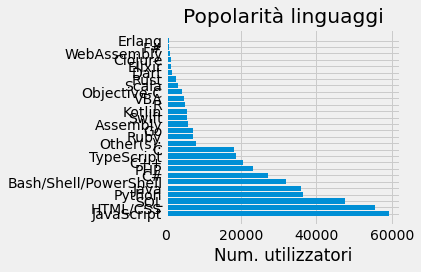

In [50]:
plt.style.use('fivethirtyeight')

#languages.reeverse()
plt.barh(languages, popularity)


plt.title('Popolarità linguaggi')
#plt.ylabel('Linguaggio')
plt.xlabel('Num. utilizzatori')

plt.tight_layout()
plt.savefig('grafico.png')
plt.show()

Se necessario l'ordinamento inverso si può invertire l'ordine delle liste in input con il metodo reverse()

E' più comodo utilizzare pandas x importare il file csv e trattarlo

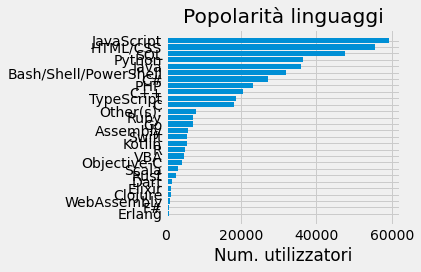

In [54]:
import pandas as pd

df = pd.read_csv('data.csv')
ids = df['Responder_id']
lang_responses = df['LanguagesWorkedWith']

language_counter = Counter()
for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []
for lang, ctr in language_counter.most_common():
    languages.append(lang)
    popularity.append(ctr)

languages.reverse()
popularity.reverse()
plt.barh(languages, popularity)

plt.title('Popolarità linguaggi')
#plt.ylabel('Linguaggio')
plt.xlabel('Num. utilizzatori')

plt.tight_layout()
plt.savefig('grafico.png')
plt.show()